In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
data = pd.read_excel("Linear regression.xlsx")

In [75]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4099 non-null   int64  
 1   sqft_living  4099 non-null   int64  
 2   bedrooms     4099 non-null   int64  
 3   bathrooms    4099 non-null   float64
 4   floors       4099 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 160.2 KB


In [77]:
data.isnull().sum() # No Null values are there in the dataset

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [78]:
data.duplicated().sum() # There are 11 duplicated value in the dataset

11

In [79]:
data.drop_duplicates(inplace=True) # we drop all the duplicaed value from the dataset`

In [80]:
# We are removing the outlier from the data we can decide it using the box plot given below
data = data[data["sqft_living"] < 8000]

In [81]:
# we can see that sqft_living has the higher value as compared to other features!

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
data1 = data.copy() # Creating copy of the dataset to test model on different condition

In [84]:
data1model = StandardScaler()
a = data1model.fit_transform(data1[["sqft_living"]])
data1["sqft_living"] = a
# Dont with scalinf of the variable

In [85]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,-0.962652,3,1.00,1.0
1,538000,0.564200,3,2.25,2.0
2,180000,-1.413018,2,1.00,1.0
3,604000,-0.105857,4,3.00,1.0
4,510000,-0.413425,3,2.00,1.0


In [86]:
data2 = data1.copy()

In [169]:
data2model = StandardScaler()
a = data2model.fit_transform(data2[["floors"]])
data2["floors"] = a

data2model = StandardScaler()
l = data2model.fit_transform(data2[["bedrooms"]])
data2["bedrooms"] = l

data2model = StandardScaler()
o = data2model.fit_transform(data2[["bathrooms"]])
data2["bathrooms"] = o
# Dont with scaling of the variable

In [170]:
data2.head() # Converted all the value using standardization

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,-0.962652,-0.401914,-1.373101,-0.845756
1,538000,0.564200,-0.401914,0.243266,1.123978
2,180000,-1.413018,-1.497922,-1.373101,-0.845756
3,604000,-0.105857,0.694094,1.213086,-0.845756
4,510000,-0.413425,-0.401914,-0.080007,-0.845756


This is the boxplot for the following variable price 



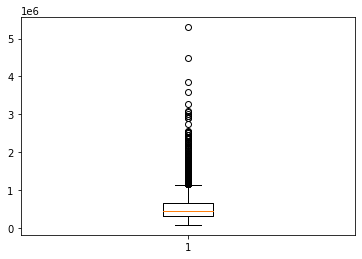

This is the boxplot for the following variable sqft_living 



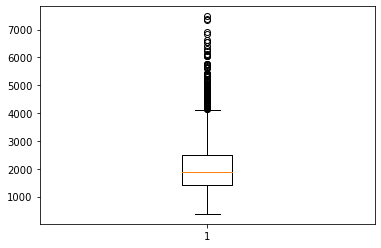

This is the boxplot for the following variable bedrooms 



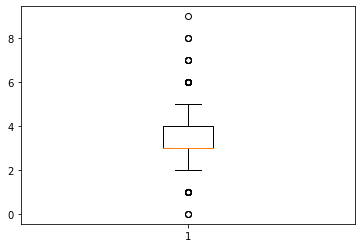

This is the boxplot for the following variable bathrooms 



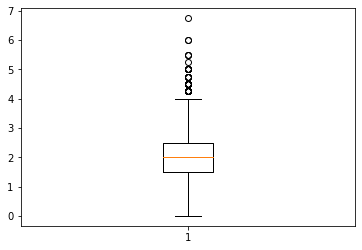

This is the boxplot for the following variable floors 



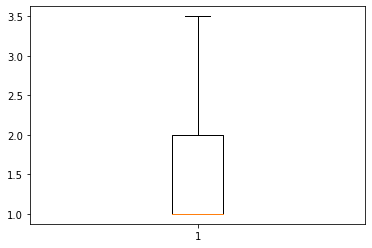

This is the boxplot for the following variable price 



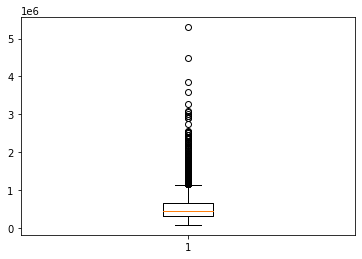

This is the boxplot for the following variable sqft_living 



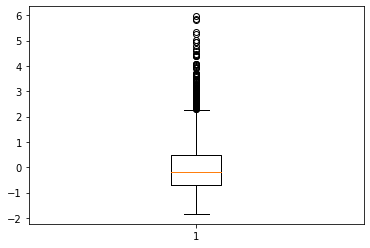

This is the boxplot for the following variable bedrooms 



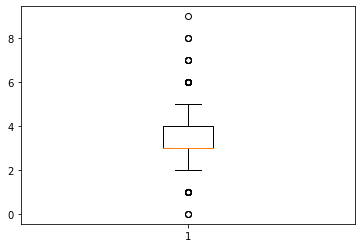

This is the boxplot for the following variable bathrooms 



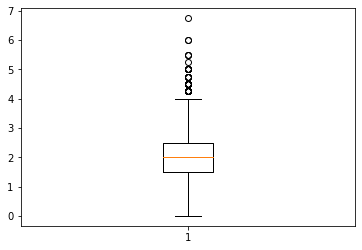

This is the boxplot for the following variable floors 



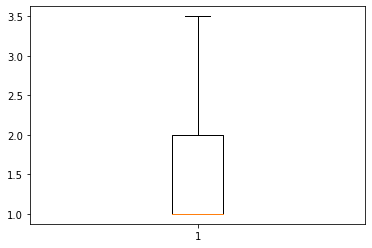

This is the boxplot for the following variable price 



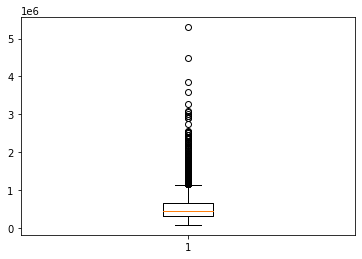

This is the boxplot for the following variable sqft_living 



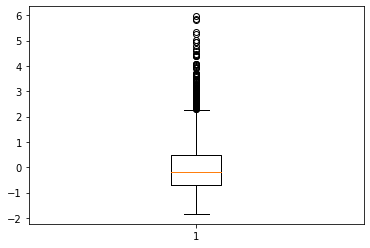

This is the boxplot for the following variable bedrooms 



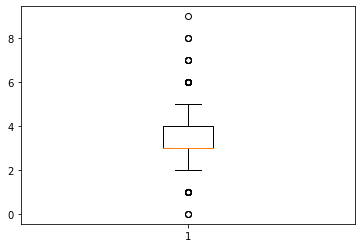

This is the boxplot for the following variable bathrooms 



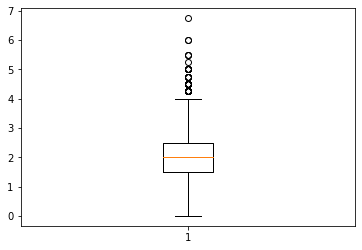

This is the boxplot for the following variable floors 



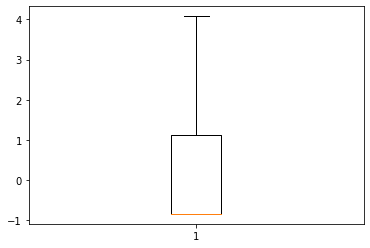

In [89]:
def outlier(data):
    for i in data.columns:
        print("This is the boxplot for the following variable", i ,"\n")
        plt.boxplot(data[i])
        plt.show()
outlier(data)
outlier(data1)
outlier(data2)

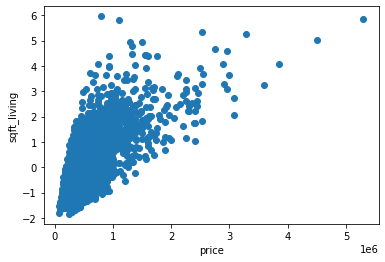

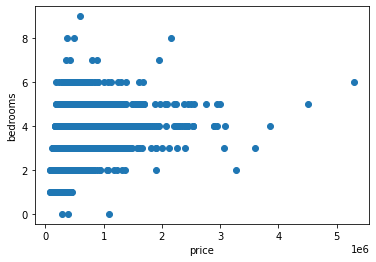

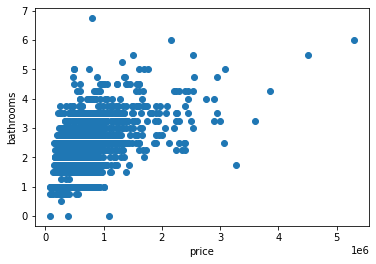

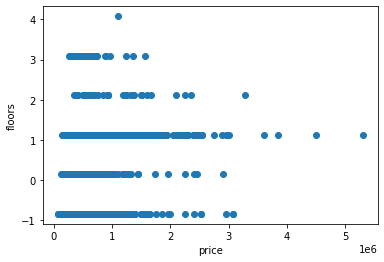

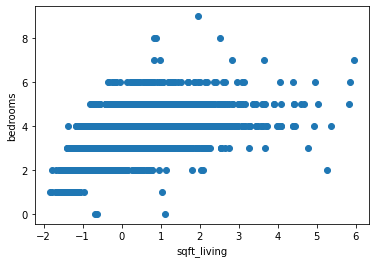

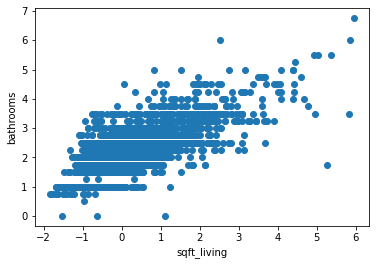

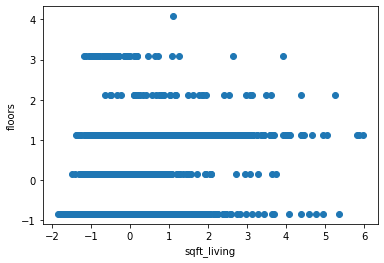

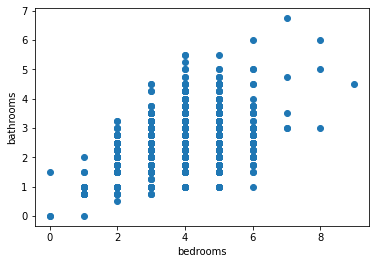

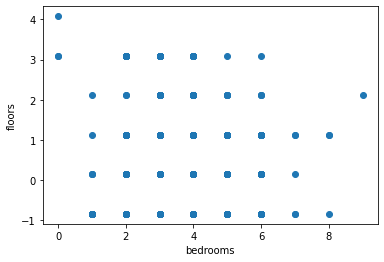

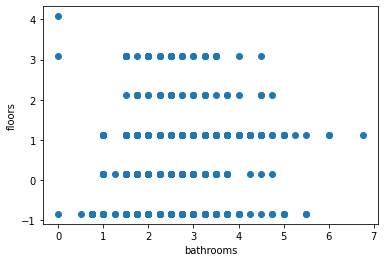

[('price', 'sqft_living'),
 ('price', 'bedrooms'),
 ('price', 'bathrooms'),
 ('price', 'floors'),
 ('sqft_living', 'bedrooms'),
 ('sqft_living', 'bathrooms'),
 ('sqft_living', 'floors'),
 ('bedrooms', 'bathrooms'),
 ('bedrooms', 'floors'),
 ('bathrooms', 'floors')]

In [121]:
from itertools import combinations
column = data.columns.values
combination  = list(combinations(column,2))
def scatter(comb):
    for j in comb:
        for i in range(1):
            plt.xlabel(j[i])
            plt.ylabel(j[i+1])
            plt.scatter(data2[j[i]],data2[j[i+1]])
            plt.show()
scatter(combination)
combination

In [122]:
# from the above plot we can see that there is some sort of the relation between sqft_living and the price
# Rest all is not showing any sort of relation with the dependant variable

In [129]:
# Splitting the data into x and y 
x = data.drop(["price"] ,axis=1)
y = data["price"]

In [132]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
         ...   
4094     660000
4095     265000
4096     599999
4097     280000
4098    1055000
Name: price, Length: 4085, dtype: int64

In [133]:
#let us choose the best feature for modelling of the data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression , chi2

In [143]:
model1 = SelectKBest(score_func = f_regression , k=3)

In [144]:
a = model1.fit(x,y)

In [145]:
a = pd.DataFrame(a.scores_)

In [146]:
b = pd.DataFrame(x.columns)

In [152]:
c = pd.concat((a,b),axis=1)
c

,0,0
0,3734.108322,sqft_living
1,426.512166,bedrooms
2,1594.210864,bathrooms
3,347.204413,floors


In [153]:
# Lets build the model and check the accuaracy of this!

# Model 1

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score , mean_squared_error

In [160]:
x = data2[["sqft_living"]]
y = data2[["price"]]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2 , random_state =2)
linear = LinearRegression()
linear.fit(xtrain,ytrain)
ypred = linear.predict(xtest)
RSME = np.sqrt(mean_squared_error(ytest,ypred))
print(RSME)
r2 = r2_score(ytest,ypred)
print(r2)


257263.77299167129
0.4765638426657146


# Model 2

In [171]:
x = data2[["bedrooms"]]
y = data2[["price"]]
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x,y,test_size = 0.2 , random_state =2)
linear2 = LinearRegression()
linear2.fit(xtrain2,ytrain2)
ypred2 = linear2.predict(xtest2)
RSME2 = np.sqrt(mean_squared_error(ytest2,ypred2))
print(RSME2)
r22 = r2_score(ytest2,ypred2)
print(r22)


331342.117109225
0.13172012424244817


# Model3

In [174]:
x = data2[["bathrooms"]]
y = data2[["price"]]
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(x,y,test_size = 0.2 , random_state =2)
linear3 = LinearRegression()
linear3.fit(xtrain3,ytrain3)
ypred3 = linear3.predict(xtest3)

RSME3 = np.sqrt(mean_squared_error(ytest3,ypred3))
print(RSME3)
r23 = r2_score(ytest3,ypred3)
print(r23)

295039.84489451215
0.31155731159702393


# Model 4

In [176]:
x = data2[["floors"]]
y = data2[["price"]]
xtrain4,xtest4,ytrain4,ytest4 = train_test_split(x,y,test_size = 0.2 , random_state =2)
linear4 = LinearRegression()
linear4.fit(xtrain4,ytrain4)
ypred4 = linear4.predict(xtest4)
RSME4 = np.sqrt(mean_squared_error(ytest4,ypred4))
print(RSME4)
r24 = r2_score(ytest4,ypred4)
print(r24)

339120.1793671526
0.09047693650451583


# Model 5

In [187]:
x5 = data2[["bathrooms","sqft_living","bedrooms"]]
y5 = data2[["price"]]
xtrain5,xtest5,ytrain5,ytest5 = train_test_split(x5,y5,test_size = 0.2 , random_state =2)
linear5 = LinearRegression()
linear5.fit(xtrain5,ytrain5)
ypred5 = linear5.predict(xtest5)
RSME5 = np.sqrt(mean_squared_error(ytest5,ypred5))
print(RSME5)
r25 = r2_score(ytest5,ypred5)
print(r25)

255165.6026233227
0.4850670196267076


# Model 6

In [208]:
x6 = data[["sqft_living","bedrooms","bathrooms","floors"]]
y6 = data[["price"]]
xtrain6,xtest6,ytrain6,ytest6 = train_test_split(x6,y6,test_size = 0.2 , random_state =2)
linear6 = LinearRegression()
linear6.fit(xtrain6,ytrain6)
ypred6 = linear6.predict(xtest6)
RSME6 = np.sqrt(mean_squared_error(ytest6,ypred6))
print(RSME6)
r26 = r2_score(ytest6,ypred6)
print(r26)

255165.51573786288
0.4850673703023527


In [212]:
# In the above case we can see that when merging up all the data we can seee that model is giving bit good accuracy
# Basicall we can see that sqft_living bathroom bedrooms have the significant difference on the price we can ignore the floor

In [213]:
a = linear5.predict(np.array([[1,1180]]))
final = a+RSME5
print(a)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [214]:
b = linear.predict(np.array([[1180]]))
final1 = b+RSME
print(b)

[[2.96712309e+08]]


In [215]:
c = linear2.predict(np.array([[3]]))
final2 = c+RSME2
print(c)

[[852167.51666449]]


In [216]:
d = linear3.predict(np.array([[1]]))
final3 = d+RSME3
print(d)

[[723461.10091994]]


In [217]:
e = linear4.predict(np.array([[1.0]]))
final4 = e+RSME4
print(e)

[[633196.78735131]]


In [218]:
data["price"]

0        221900
1        538000
2        180000
3        604000
4        510000
         ...   
4094     660000
4095     265000
4096     599999
4097     280000
4098    1055000
Name: price, Length: 4085, dtype: int64

In [219]:
(a+b+d) /3

array([[99145256.28497034],
       [99145256.94154845],
       [99145256.28497034],
       ...,
       [99145257.26983748],
       [99145256.94154845],
       [99145256.94154845]])

<AxesSubplot:>

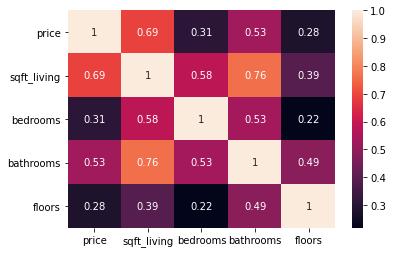

In [223]:
sns.heatmap(data.corr(),annot = True)

In [221]:
# We need to drop floors columns as it has the worst correlation with the price!

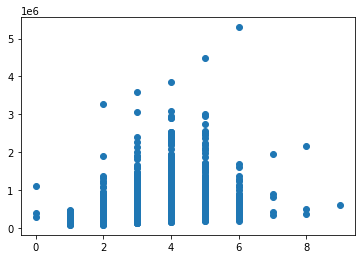

In [222]:
plt.scatter(data["bedrooms"],data["price"])

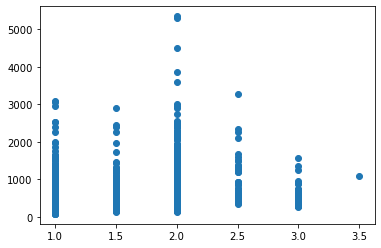

In [106]:
plt.scatter(data["floors"],data["price"])

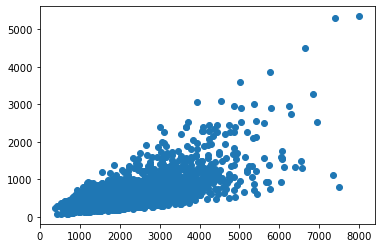

In [107]:
plt.scatter(data["sqft_living"],data["price"])

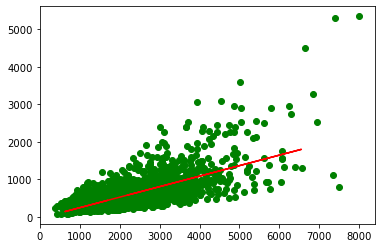

In [121]:
plt.plot(xtest,ypred ,color = "red")
plt.scatter(xtrain,ytrain , color= "green")